In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import matplotlib.pyplot as plt

In [51]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
dataset = pd.read_csv("Taj_Hotel_Reviews.csv")
dataset.head()

,Unnamed: 0,Reviewer,Review,Ratings,Date
0,0,tarunsonawat,"Amazing, relaxed and a safe trip. The services...",5,Yesterday
1,1,priyeshvarsolkar,We had great time. We went for our 1st marriag...,5,Yesterday
2,2,cgganster,We normally stay at the Taj Lands End due to i...,5,7 Dec
3,3,tanishq2020,"Terrible service of restaurant VISTAS , they d...",1,6 Dec
4,4,CAAshok71,The hotel is located at a very nice place and ...,3,6 Dec


In [58]:
dataset['Date'][234][-8:]

'Sep 2019'

In [59]:
# by this I get 6 Dec from w 6 Dec 

for i in range(2,len(dataset['Date'])):
    if len(dataset['Date'][i].split()) > 2:
        dataset['Date'][i] = dataset['Date'][i][-8:]

c:\users\sonih\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [60]:
dataset['Date'][234]

'Sep 2019'

In [61]:
dataset.head()

,Unnamed: 0,Reviewer,Review,Ratings,Date
0,0,tarunsonawat,"Amazing, relaxed and a safe trip. The services...",5,Yesterday
1,1,priyeshvarsolkar,We had great time. We went for our 1st marriag...,5,Yesterday
2,2,cgganster,We normally stay at the Taj Lands End due to i...,5,7 Dec
3,3,tanishq2020,"Terrible service of restaurant VISTAS , they d...",1,6 Dec
4,4,CAAshok71,The hotel is located at a very nice place and ...,3,6 Dec


In [62]:
# by this if len(dataset['Date'].split) > 2 then Dec 2020

for i in range(len(dataset['Date'])):
    if len(dataset['Date'][i].split()) == 3:
        data = dataset['Date'][i].split()
        dataset['Date'][i] = data[1] +" "+data[2]

c:\users\sonih\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
dataset.head()

,Unnamed: 0,Reviewer,Review,Ratings,Date
0,0,tarunsonawat,"Amazing, relaxed and a safe trip. The services...",5,Yesterday
1,1,priyeshvarsolkar,We had great time. We went for our 1st marriag...,5,Yesterday
2,2,cgganster,We normally stay at the Taj Lands End due to i...,5,7 Dec
3,3,tanishq2020,"Terrible service of restaurant VISTAS , they d...",1,6 Dec
4,4,CAAshok71,The hotel is located at a very nice place and ...,3,6 Dec


In [64]:
# in it I convert yesterday into date

for i in range(len(dataset['Date'])):
    if dataset['Date'][i] == 'Yesterday':
        dataset['Date'][i] = '8 Dec'
    

c:\users\sonih\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [65]:
dataset.head()

,Unnamed: 0,Reviewer,Review,Ratings,Date
0,0,tarunsonawat,"Amazing, relaxed and a safe trip. The services...",5,8 Dec
1,1,priyeshvarsolkar,We had great time. We went for our 1st marriag...,5,8 Dec
2,2,cgganster,We normally stay at the Taj Lands End due to i...,5,7 Dec
3,3,tanishq2020,"Terrible service of restaurant VISTAS , they d...",1,6 Dec
4,4,CAAshok71,The hotel is located at a very nice place and ...,3,6 Dec


In [66]:
data = dataset['Date'][0]
data[2:]+" 2020"

'Dec 2020'

In [67]:
# first 8 values in date column is like 1 Dec. So, I convert it into Dec 2020

for i in range(9):
    data = dataset['Date'][i][2:]
    dataset['Date'][i] = data+" 2020"

c:\users\sonih\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [68]:
dataset.head()

,Unnamed: 0,Reviewer,Review,Ratings,Date
0,0,tarunsonawat,"Amazing, relaxed and a safe trip. The services...",5,Dec 2020
1,1,priyeshvarsolkar,We had great time. We went for our 1st marriag...,5,Dec 2020
2,2,cgganster,We normally stay at the Taj Lands End due to i...,5,Dec 2020
3,3,tanishq2020,"Terrible service of restaurant VISTAS , they d...",1,Dec 2020
4,4,CAAshok71,The hotel is located at a very nice place and ...,3,Dec 2020


In [69]:
month = []
year = []

for i in range(len(dataset['Date'])):
    data = dataset['Date'][i].split()
    month.append(data[0])
    year.append(data[1])
    
dataset['Review_Month'] = month
dataset['Review_Year'] = year

In [70]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset.head()

,Reviewer,Review,Ratings,Date,Review_Month,Review_Year
0,tarunsonawat,"Amazing, relaxed and a safe trip. The services...",5,Dec 2020,Dec,2020
1,priyeshvarsolkar,We had great time. We went for our 1st marriag...,5,Dec 2020,Dec,2020
2,cgganster,We normally stay at the Taj Lands End due to i...,5,Dec 2020,Dec,2020
3,tanishq2020,"Terrible service of restaurant VISTAS , they d...",1,Dec 2020,Dec,2020
4,CAAshok71,The hotel is located at a very nice place and ...,3,Dec 2020,Dec,2020


In [71]:
dataset['Polarity_Rating'] = dataset['Ratings'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [72]:
dataset.head()

,Reviewer,Review,Ratings,Date,Review_Month,Review_Year,Polarity_Rating
0,tarunsonawat,"Amazing, relaxed and a safe trip. The services...",5,Dec 2020,Dec,2020,Positive
1,priyeshvarsolkar,We had great time. We went for our 1st marriag...,5,Dec 2020,Dec,2020,Positive
2,cgganster,We normally stay at the Taj Lands End due to i...,5,Dec 2020,Dec,2020,Positive
3,tanishq2020,"Terrible service of restaurant VISTAS , they d...",1,Dec 2020,Dec,2020,Negative
4,CAAshok71,The hotel is located at a very nice place and ...,3,Dec 2020,Dec,2020,Neutral


## Visualization

<AxesSubplot:xlabel='Ratings', ylabel='count'>

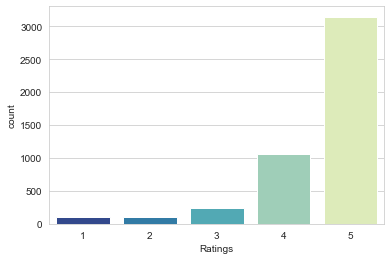

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='Ratings',data=dataset, palette='YlGnBu_r')

<AxesSubplot:xlabel='Polarity_Rating', ylabel='count'>

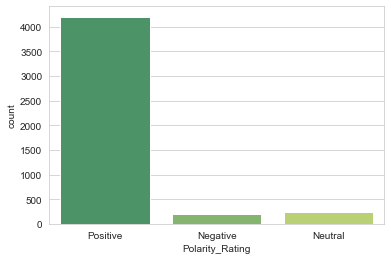

In [74]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=dataset, palette='summer')

c:\users\sonih\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


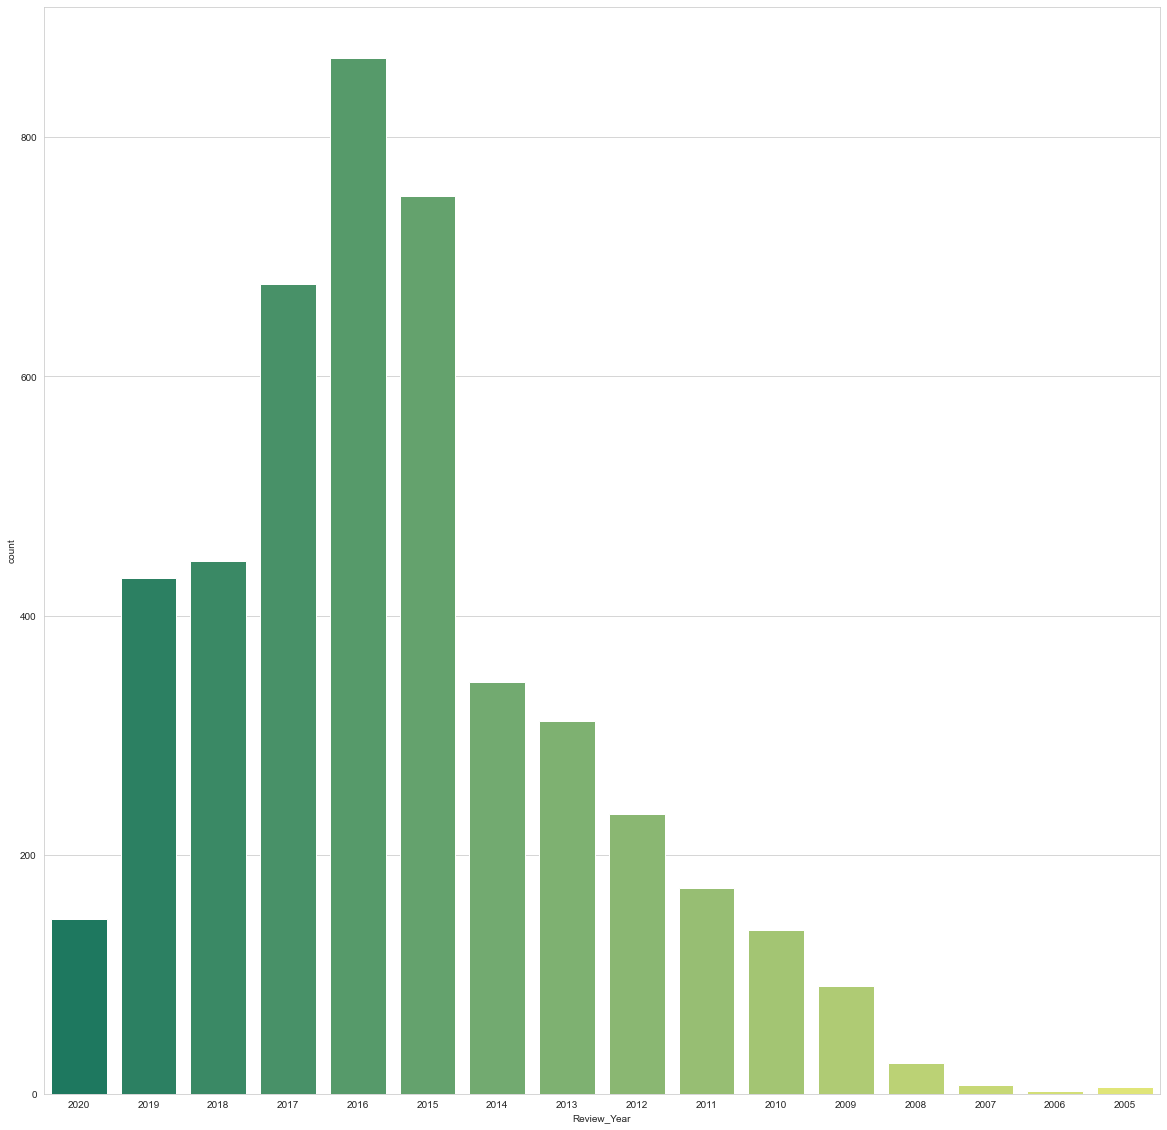

In [75]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.countplot(dataset['Review_Year'] ,data=dataset, palette='summer')
plt.show()

c:\users\sonih\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


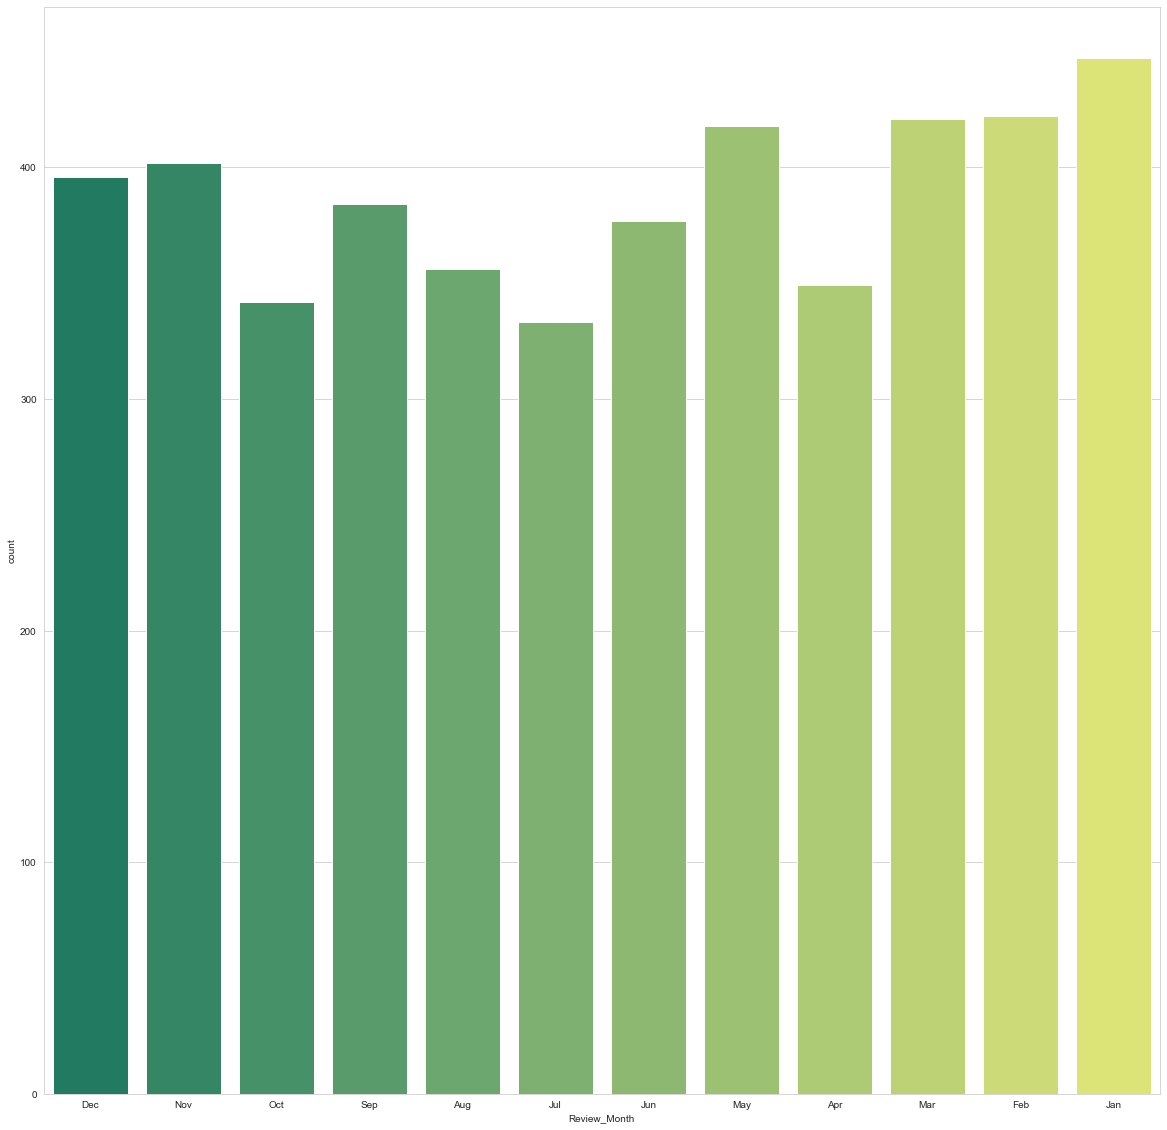

In [76]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.countplot(dataset['Review_Month'] ,data=dataset, palette='summer')
plt.show()

## Data Preprocessing

In [77]:
dataset_Positive = dataset[dataset['Polarity_Rating'] == 'Positive'][0:500]
dataset_Neutral = dataset[dataset['Polarity_Rating'] == 'Neutral']
dataset_Negative = dataset[dataset['Polarity_Rating'] == 'Negative']

### Sample negative and neutral dataset and create a final dataset:

In [78]:
dataset_Neutral_over = dataset_Neutral.sample(500, replace=True)
dataset_Negative_over = dataset_Negative.sample(500, replace=True)
dataset = pd.concat([dataset_Positive, dataset_Neutral_over, dataset_Negative_over], axis=0)

In [79]:
dataset.head()

,Reviewer,Review,Ratings,Date,Review_Month,Review_Year,Polarity_Rating
0,tarunsonawat,"Amazing, relaxed and a safe trip. The services...",5,Dec 2020,Dec,2020,Positive
1,priyeshvarsolkar,We had great time. We went for our 1st marriag...,5,Dec 2020,Dec,2020,Positive
2,cgganster,We normally stay at the Taj Lands End due to i...,5,Dec 2020,Dec,2020,Positive
5,ANGATraveen,The hotel is pretty good... amazingly located....,5,Dec 2020,Dec,2020,Positive
6,Sarosh,"Wonderful experience, the staff is excellent a...",5,Dec 2020,Dec,2020,Positive


## Text Processing

In [80]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [81]:
from nltk.stem import LancasterStemmer, SnowballStemmer, PorterStemmer

In [28]:
lancaster = LancasterStemmer()
porter = PorterStemmer()
Snowball = SnowballStemmer("english")

In [82]:
dataset['Review Text'] = dataset['Review'].apply(get_text_processing)
dataset.head()

,Reviewer,Review,Ratings,Date,Review_Month,Review_Year,Polarity_Rating,Review Text
0,tarunsonawat,"Amazing, relaxed and a safe trip. The services...",5,Dec 2020,Dec,2020,Positive,Amazing relaxed safe trip services good staff ...
1,priyeshvarsolkar,We had great time. We went for our 1st marriag...,5,Dec 2020,Dec,2020,Positive,great time went 1st marriage anniversary great...
2,cgganster,We normally stay at the Taj Lands End due to i...,5,Dec 2020,Dec,2020,Positive,normally stay Taj Lands End due location Bandr...
5,ANGATraveen,The hotel is pretty good... amazingly located....,5,Dec 2020,Dec,2020,Positive,hotel pretty good amazingly located Quite easy...
6,Sarosh,"Wonderful experience, the staff is excellent a...",5,Dec 2020,Dec,2020,Positive,Wonderful experience staff excellent polite ev...


In [83]:
final_data = dataset[['Review Text','Polarity_Rating']]
final_data.head()

,Review Text,Polarity_Rating
0,Amazing relaxed safe trip services good staff ...,Positive
1,great time went 1st marriage anniversary great...,Positive
2,normally stay Taj Lands End due location Bandr...,Positive
5,hotel pretty good amazingly located Quite easy...,Positive
6,Wonderful experience staff excellent polite ev...,Positive


In [99]:
dataset['Review Text'][3] = set(dataset['Review Text'][3])

TypeError: unhashable type: 'set'

In [34]:
darasetSet = set()
datasetSet = dataset['Review Text']


In [100]:
dataset['Review Text'][3]

3    {Terrible service restaurant VISTAS dont know ...
3    {Terrible service restaurant VISTAS dont know ...
3    {Terrible service restaurant VISTAS dont know ...
3    {Terrible service restaurant VISTAS dont know ...
3    {Terrible service restaurant VISTAS dont know ...
Name: Review Text, dtype: object

In [102]:
dataset.sort_index(axis=0, ascending=True)

,Reviewer,Review,Ratings,Date,Review_Month,Review_Year,Polarity_Rating,Review Text
0,tarunsonawat,"Amazing, relaxed and a safe trip. The services...",5,Dec 2020,Dec,2020,Positive,Amazing relaxed safe trip services good staff ...
1,priyeshvarsolkar,We had great time. We went for our 1st marriag...,5,Dec 2020,Dec,2020,Positive,great time went 1st marriage anniversary great...
2,cgganster,We normally stay at the Taj Lands End due to i...,5,Dec 2020,Dec,2020,Positive,normally stay Taj Lands End due location Bandr...
3,tanishq2020,"Terrible service of restaurant VISTAS , they d...",1,Dec 2020,Dec,2020,Negative,{Terrible service restaurant VISTAS dont know ...
3,tanishq2020,"Terrible service of restaurant VISTAS , they d...",1,Dec 2020,Dec,2020,Negative,{Terrible service restaurant VISTAS dont know ...
...,...,...,...,...,...,...,...,...
4640,SugarWahine,Just finished a stay at the Taj Lands End. De...,2,Jul 2006,Jul,2006,Negative,finished stay Taj Lands End Definitely expecti...
4640,SugarWahine,Just finished a stay at the Taj Lands End. De...,2,Jul 2006,Jul,2006,Negative,finished stay Taj Lands End Definitely expecti...
4643,Navigate23779,"Stayed at the Taj Lands End, at the end of Sep...",2,Oct 2005,Oct,2005,Negative,Stayed Taj Lands End end September 2005 hotel ...
4643,Navigate23779,"Stayed at the Taj Lands End, at the end of Sep...",2,Oct 2005,Oct,2005,Negative,Stayed Taj Lands End end September 2005 hotel ...


ModuleNotFoundError: No module named 'imblearn'

In [79]:
type(dataset['Review Text'][4])

str

In [36]:
from nltk import PorterStemmer
stemmer = PorterStemmer()

In [101]:
w = []
for i in range(5):
    #print(dataset['Review Text'][4])
    if i != 4:
        #print(i)
        res = str(" ".join(re.findall(r'\w+', datasetSet[i])))
        print(type(res))
        #words = nltk.word_tokenize(dataset['Review Text'][i])
        #words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
        #w.append(' '.join(words))

<class 'str'>
<class 'str'>
<class 'str'>


TypeError: expected string or bytes-like object

In [67]:
w

['hotel locat nice place taj signatur servic standard good worth money enjoy stay charg extra water fair otherwis overal good experi would recommend hotel']

In [51]:
final_data.to_csv("finalDataSet.csv")